# English Wikipedia page views 2007 - 2018

Ensure you have *requests* installed.

In [2]:
# Standard imports for python
import numpy as np
import pandas as pd

# import for plots
import matplotlib.pyplot as plt

# used in api_call() below
import requests


## Create API queries

Create endpoints for Page Views API and Legacy Page Counts API

In [3]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Create parameters for api_call() (See API Call Function below)

In [4]:
# Customize these with your own information by replacing "hmurph3"
headers = {
    'User-Agent': 'https://github.com/hmurph3',
    'From': 'hmurph3@uw.edu'
}

In [5]:
# parameters for getting aggregated legacy view data
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

# for desktop site
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# for mobile-site
params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

#parameters for getting aggregated current standard pageview data for desktop-site
# only interested in organic traffic (filtering "agent" by "user")
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end

#for desktop

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# for mobile-app
params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# for mobile-web
params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

## API Call Function

In [6]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [7]:
legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)

In [8]:
#print(legacy_desktop)

In [9]:
legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)

In [10]:
#print(legacy_mobile)

In [12]:
pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)

In [13]:
#print(pageviews_desktop)

In [14]:
pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

In [15]:
#(pageviews_mobile_app)

In [16]:
pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

In [17]:
#print(pageviews_mobile_web)

### Write queries to .json files
Where I found how to read/write .json files: http://gowrishankarnath.com/read-write-json-python/.  Saves as a dictionary of size one with a key of "items". Dictionary is a list of dictionaries containing paramaters from api_call(). 

In [18]:
import json

In [19]:
with open('pagecounts_desktop-site_200712-201607.json', 'w') as f:
     json.dump(legacy_desktop, f)

In [20]:
with open('pagecounts_mobile-site_200712-201607.json', 'w') as f:
     json.dump(legacy_mobile, f)

In [21]:
with open('pageviews_desktop_201507-201809.json', 'w') as f:
     json.dump(pageviews_desktop, f)

In [22]:
with open('pageviews_mobile_app_201507-201809.json', 'w') as f:
     json.dump(pageviews_mobile_app, f)

In [23]:
with open('pageviews_mobile_site_201507-201809.json', 'w') as f:
     json.dump(pageviews_mobile_web, f)

# Data Processing

### Convert queries to data frames

In [24]:
pagecount_desktop = pd.DataFrame(legacy_desktop['items'])
pagecount_mobile = pd.DataFrame(legacy_mobile['items'])
pageview_desktop = pd.DataFrame(pageviews_desktop['items'])
pageview_mobile_app = pd.DataFrame(pageviews_mobile_app['items'])
pageview_mobile_web = pd.DataFrame(pageviews_mobile_web['items'])

Example of dataframe below

In [25]:
pageview_mobile_app.head()

,access,agent,granularity,project,timestamp,views
0,mobile-app,user,monthly,en.wikipedia,2015070100,109624146
1,mobile-app,user,monthly,en.wikipedia,2015080100,109669149
2,mobile-app,user,monthly,en.wikipedia,2015090100,96221684
3,mobile-app,user,monthly,en.wikipedia,2015100100,94523777
4,mobile-app,user,monthly,en.wikipedia,2015110100,94353925


### Combining monthly values for mobile-app and mobile-web for Pageviews into one so that pagecount and pageview are comparable.

In [27]:
# verify the same same timeframe is caputred by testing if the timestapms are the same between the mobile app and mobile web are the same
pageview_mobile_app['timestamp'].equals(pageview_mobile_web['timestamp'])

True

In [28]:
# since mobile_app and mobile_web have been collected over the same amount of time, you can combine each row.

# create a copy of one of the data frames
pageview_mobile = pageview_mobile_app.copy()

In [29]:
pageview_mobile.head()

,access,agent,granularity,project,timestamp,views
0,mobile-app,user,monthly,en.wikipedia,2015070100,109624146
1,mobile-app,user,monthly,en.wikipedia,2015080100,109669149
2,mobile-app,user,monthly,en.wikipedia,2015090100,96221684
3,mobile-app,user,monthly,en.wikipedia,2015100100,94523777
4,mobile-app,user,monthly,en.wikipedia,2015110100,94353925


In [30]:
# chage access from "mobile-app" to "mobile-views"
pageview_mobile = pageview_mobile.replace("mobile-app", "mobile-views")
pageview_mobile.head()

,access,agent,granularity,project,timestamp,views
0,mobile-views,user,monthly,en.wikipedia,2015070100,109624146
1,mobile-views,user,monthly,en.wikipedia,2015080100,109669149
2,mobile-views,user,monthly,en.wikipedia,2015090100,96221684
3,mobile-views,user,monthly,en.wikipedia,2015100100,94523777
4,mobile-views,user,monthly,en.wikipedia,2015110100,94353925


In [31]:
x, y = pageview_mobile.shape
print("rows = ", x, " and columns = ", y)

rows =  39  and columns =  6


In [32]:
# replace each months views in pageview_mobile with the sum of the views of pageview_mobile_app and pageview_mobile_web

index = pageview_mobile.shape[0]

pageview_mobile['views'] = pageview_mobile_app['views'] + pageview_mobile_web['views']

pageview_mobile.head()

,access,agent,granularity,project,timestamp,views
0,mobile-views,user,monthly,en.wikipedia,2015070100,3288755294
1,mobile-views,user,monthly,en.wikipedia,2015080100,3302333038
2,mobile-views,user,monthly,en.wikipedia,2015090100,3170203333
3,mobile-views,user,monthly,en.wikipedia,2015100100,3268499132
4,mobile-views,user,monthly,en.wikipedia,2015110100,3236601070


In [33]:
pageview_mobile_app.head()

,access,agent,granularity,project,timestamp,views
0,mobile-app,user,monthly,en.wikipedia,2015070100,109624146
1,mobile-app,user,monthly,en.wikipedia,2015080100,109669149
2,mobile-app,user,monthly,en.wikipedia,2015090100,96221684
3,mobile-app,user,monthly,en.wikipedia,2015100100,94523777
4,mobile-app,user,monthly,en.wikipedia,2015110100,94353925


In [34]:
pageview_mobile_web.head()

,access,agent,granularity,project,timestamp,views
0,mobile-web,user,monthly,en.wikipedia,2015070100,3179131148
1,mobile-web,user,monthly,en.wikipedia,2015080100,3192663889
2,mobile-web,user,monthly,en.wikipedia,2015090100,3073981649
3,mobile-web,user,monthly,en.wikipedia,2015100100,3173975355
4,mobile-web,user,monthly,en.wikipedia,2015110100,3142247145


In [35]:
pageview_mobile.head()

,access,agent,granularity,project,timestamp,views
0,mobile-views,user,monthly,en.wikipedia,2015070100,3288755294
1,mobile-views,user,monthly,en.wikipedia,2015080100,3302333038
2,mobile-views,user,monthly,en.wikipedia,2015090100,3170203333
3,mobile-views,user,monthly,en.wikipedia,2015100100,3268499132
4,mobile-views,user,monthly,en.wikipedia,2015110100,3236601070


### Seperate "timestamp" into four digit year (YYYY) and two digit month (MM)

Create a funcion to add month and year columns based off of the timestamp column
takes in the pagecount/pageview dataframes created above. Does not change dataframe passed in.

In [36]:
def add_year_month(dataframe):
    dataframe_copy = dataframe.copy()
    year = []
    month = []
    timestamp = dataframe_copy['timestamp']

    for i in range(len(timestamp)):
        year.append(timestamp[i][0:4])
        month.append(timestamp[i][4:6])

    dataframe_copy['year'] = year
    dataframe_copy['month'] = month
    return dataframe_copy


Example of function running

In [37]:
pageview_mobile_add_year_month = add_year_month(pageview_mobile)

In [38]:
pageview_mobile_add_year_month.head()

,access,agent,granularity,project,timestamp,views,year,month
0,mobile-views,user,monthly,en.wikipedia,2015070100,3288755294,2015,07
1,mobile-views,user,monthly,en.wikipedia,2015080100,3302333038,2015,08
2,mobile-views,user,monthly,en.wikipedia,2015090100,3170203333,2015,09
3,mobile-views,user,monthly,en.wikipedia,2015100100,3268499132,2015,10
4,mobile-views,user,monthly,en.wikipedia,2015110100,3236601070,2015,11


In [39]:
pageview_mobile.head()

,access,agent,granularity,project,timestamp,views
0,mobile-views,user,monthly,en.wikipedia,2015070100,3288755294
1,mobile-views,user,monthly,en.wikipedia,2015080100,3302333038
2,mobile-views,user,monthly,en.wikipedia,2015090100,3170203333
3,mobile-views,user,monthly,en.wikipedia,2015100100,3268499132
4,mobile-views,user,monthly,en.wikipedia,2015110100,3236601070


Add year and month to other dataframes

In [40]:
pageview_desktop_add_year_month = add_year_month(pageview_desktop)
pageview_desktop_add_year_month.head()

,access,agent,granularity,project,timestamp,views,year,month
0,desktop,user,monthly,en.wikipedia,2015070100,4376666686,2015,07
1,desktop,user,monthly,en.wikipedia,2015080100,4332482183,2015,08
2,desktop,user,monthly,en.wikipedia,2015090100,4485491704,2015,09
3,desktop,user,monthly,en.wikipedia,2015100100,4477532755,2015,10
4,desktop,user,monthly,en.wikipedia,2015110100,4287720220,2015,11


In [41]:
pagecount_desktop_add_year_month = add_year_month(pagecount_desktop)
pagecount_desktop_add_year_month.head()

,access-site,count,granularity,project,timestamp,year,month
0,desktop-site,2998331524,monthly,en.wikipedia,2007120100,2007,12
1,desktop-site,4930902570,monthly,en.wikipedia,2008010100,2008,01
2,desktop-site,4818393763,monthly,en.wikipedia,2008020100,2008,02
3,desktop-site,4955405809,monthly,en.wikipedia,2008030100,2008,03
4,desktop-site,5159162183,monthly,en.wikipedia,2008040100,2008,04


In [42]:
pagecount_mobile_add_year_month = add_year_month(pagecount_mobile)
pagecount_mobile_add_year_month.head()

,access-site,count,granularity,project,timestamp,year,month
0,mobile-site,3091546685,monthly,en.wikipedia,2014100100,2014,10
1,mobile-site,3027489668,monthly,en.wikipedia,2014110100,2014,11
2,mobile-site,3278950021,monthly,en.wikipedia,2014120100,2014,12
3,mobile-site,3485302091,monthly,en.wikipedia,2015010100,2015,01
4,mobile-site,3091534479,monthly,en.wikipedia,2015020100,2015,02


# Combine pageviews and pagecounts for desktop and mobile into one dataset

Combine all datasets into one file with columns for year, month and the number of views for all pagecount views, pagecount desktop views, pagecount mobile views, all pageviews views, pageviews desktop vies, and pageviews mobile views.

Removed the following columns:
access-site, granularity, project, timestamp as they are not needed to plot overall webpage traffic

Used https://pandas.pydata.org/pandas-docs/stable/merging.html to setup merging of data frames

In [43]:
# create pagecount_mobile_view table
pagecount_mobile_views = pagecount_mobile_add_year_month.loc[:, ['year', 'month', 'count']]
pagecount_mobile_views = pagecount_mobile_views.rename(columns = {'count': 'pagecount_mobile_views'})
pagecount_mobile_views.head()

,year,month,pagecount_mobile_views
0,2014,10,3091546685
1,2014,11,3027489668
2,2014,12,3278950021
3,2015,01,3485302091
4,2015,02,3091534479


In [44]:
# create pagecount_desktop_view table
pagecount_desktop_views = pagecount_desktop_add_year_month.loc[:, ['year', 'month', 'count']]
pagecount_desktop_views = pagecount_desktop_views.rename(columns = {'count': 'pagecount_desktop_views'})
pagecount_desktop_views.head()

,year,month,pagecount_desktop_views
0,2007,12,2998331524
1,2008,01,4930902570
2,2008,02,4818393763
3,2008,03,4955405809
4,2008,04,5159162183


In [45]:
# create pageview_mobile_view table
pageviews_mobile_views = pageview_mobile_add_year_month.loc[:, ['year', 'month', 'views']]
pageviews_mobile_views = pageviews_mobile_views.rename(columns = {'views': 'pageviews_mobile_views'})
pageviews_mobile_views.head()

,year,month,pageviews_mobile_views
0,2015,07,3288755294
1,2015,08,3302333038
2,2015,09,3170203333
3,2015,10,3268499132
4,2015,11,3236601070


In [46]:
# create pageviews_desktop_view table
pageviews_desktop_views = pageview_desktop_add_year_month.loc[:, ['year', 'month', 'views']]
pageviews_desktop_views = pageviews_desktop_views.rename(columns = {'views': 'pageviews_desktop_views'})
pageviews_desktop_views.head()

,year,month,pageviews_desktop_views
0,2015,07,4376666686
1,2015,08,4332482183
2,2015,09,4485491704
3,2015,10,4477532755
4,2015,11,4287720220


In [47]:
# merge pageview tables
years = np.arange(2007, 2019, 1)
months = np.arange(1, 13, 1)
results_pageviews = pd.merge(pageviews_desktop_views, pageviews_mobile_views, on = ['year', 'month'], how = 'outer')
results_pageviews['pageviews_all_views'] = results_pageviews['pageviews_desktop_views'] + results_pageviews['pageviews_mobile_views']
results_pageviews.head()

,year,month,pageviews_desktop_views,pageviews_mobile_views,pageviews_all_views
0,2015,07,4376666686,3288755294,7665421980
1,2015,08,4332482183,3302333038,7634815221
2,2015,09,4485491704,3170203333,7655695037
3,2015,10,4477532755,3268499132,7746031887
4,2015,11,4287720220,3236601070,7524321290


In [48]:
# merge pagecounts talbes
results_pagecounts = pd.merge(pagecount_desktop_views, pagecount_mobile_views, on = ['year', 'month'], how = 'outer').fillna(0)
all_views = results_pagecounts['pagecount_desktop_views'] + results_pagecounts['pagecount_mobile_views']

results_pagecounts['pagecounts_all_views'] = results_pagecounts['pagecount_desktop_views'] + results_pagecounts['pagecount_mobile_views']
results_pagecounts.head()

,year,month,pagecount_desktop_views,pagecount_mobile_views,pagecounts_all_views
0,2007,12,2998331524,0.0,2.998332e+09
1,2008,01,4930902570,0.0,4.930903e+09
2,2008,02,4818393763,0.0,4.818394e+09
3,2008,03,4955405809,0.0,4.955406e+09
4,2008,04,5159162183,0.0,5.159162e+09


In [49]:
# merge page counts and pageviews
wikipedia_traffic = pd.merge(results_pagecounts, results_pageviews, on = ['year', 'month'], how = 'outer').fillna(0)
wikipedia_traffic.head()

,year,month,pagecount_desktop_views,pagecount_mobile_views,pagecounts_all_views,pageviews_desktop_views,pageviews_mobile_views,pageviews_all_views
0,2007,12,2.998332e+09,0.0,2.998332e+09,0.0,0.0,0.0
1,2008,01,4.930903e+09,0.0,4.930903e+09,0.0,0.0,0.0
2,2008,02,4.818394e+09,0.0,4.818394e+09,0.0,0.0,0.0
3,2008,03,4.955406e+09,0.0,4.955406e+09,0.0,0.0,0.0
4,2008,04,5.159162e+09,0.0,5.159162e+09,0.0,0.0,0.0


### Write to csv file

In [50]:
wikipedia_traffic.to_csv('en-wikipedia_traffic_200712-201809.csv')

# Create plot
referneced https://matplotlib.org/index.html for making plots

In [51]:
# convert zeros to "nan" to avoid plotting zero values
wikipedia_traffic_nan = wikipedia_traffic
wikipedia_traffic_nan[wikipedia_traffic_nan == 0] = np.nan

wikipedia_traffic_nan.head()

,year,month,pagecount_desktop_views,pagecount_mobile_views,pagecounts_all_views,pageviews_desktop_views,pageviews_mobile_views,pageviews_all_views
0,2007,12,2.998332e+09,NaN,2.998332e+09,NaN,NaN,NaN
1,2008,01,4.930903e+09,NaN,4.930903e+09,NaN,NaN,NaN
2,2008,02,4.818394e+09,NaN,4.818394e+09,NaN,NaN,NaN
3,2008,03,4.955406e+09,NaN,4.955406e+09,NaN,NaN,NaN
4,2008,04,5.159162e+09,NaN,5.159162e+09,NaN,NaN,NaN


See https://matplotlib.org/examples/pylab_examples/major_minor_demo1.html for major and minor tick line documentation used

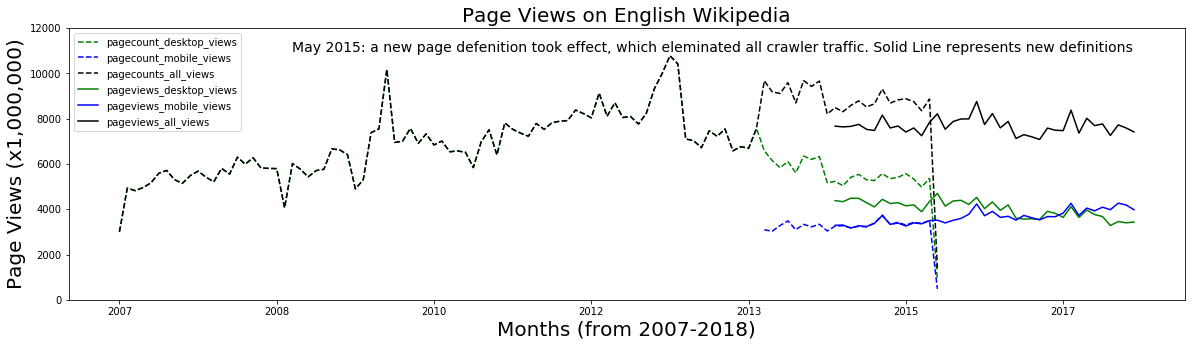

In [76]:
# to use minor and major tick marks on graphs.
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates

fig, ax = plt.subplots(figsize=(20, 5))

plt.ylim(0, 12000000000)

# plot lines
line1 = plt.plot(wikipedia_traffic_nan['pagecount_desktop_views'], c = 'green', ls = "--")
line2 = plt.plot(wikipedia_traffic_nan['pagecount_mobile_views'], c = 'blue',ls = "--")
line3 = plt.plot(wikipedia_traffic_nan['pagecounts_all_views'], c = 'black', ls = "--")
line4 = plt.plot(wikipedia_traffic_nan['pageviews_desktop_views'], c = 'green')
line5 = plt.plot(wikipedia_traffic_nan['pageviews_mobile_views'], c = 'blue')
line6 = plt.plot(wikipedia_traffic_nan['pageviews_all_views'], c = 'black')

plt.xlabel("Months (from 2007-2018)", fontsize = 20)
plt.ylabel("Page Views (x1,000,000)", fontsize = 20)
plt.title("Page Views on English Wikipedia", fontsize = 20)

textstr = "May 2015: a new page defenition took effect, which eleminated all crawler traffic. Solid Line represents new definitions"

# these are matplotlib.patch.Patch properties
props = dict(facecolor='none', edgecolor = 'none', alpha=0.5)

# place a text box
ax.text(0.20, .9, textstr,transform=ax.transAxes,fontsize=14,
        verticalalignment='bottom', bbox=props)
ax.legend(loc = 2)

# create x and y axies
# see plt.FuncFormatter section of https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
def year_ticks(month, ticks):
    year = month / 12
    return int(year) + 2007

def views_ticks(views, ticks):
    value = views / 1000000
    return int(value)

ax.xaxis.set_major_formatter(plt.FuncFormatter(year_ticks))
ax.yaxis.set_major_formatter(plt.FuncFormatter(views_ticks))

# save image to a file
# plt.show()
plt.savefig('en-wikipedia_trafic_200712-201809.png', bbox_inches='tight')